### Importação das bibliotecas
Importamos as bibliotecas necessárias para análise e tratamento de Outliers e Valores Ausentes.

In [1]:
# Leitura do CSV
import pandas as pd

# Analise de Outliers
from scipy import stats  # Estatísticas e testes
from scipy.stats import zscore  # Cálculo de z-scores  
from sklearn.ensemble import IsolationForest  # Detecção de outliers
from sklearn.cluster import KMeans  # Agrupamento de dados
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Analise de Valores Ausente
import seaborn as sns
import numpy as np  # Operações matemáticas e manipulação de arrays
import missingno as msno
from scipy.stats import chi2_contingency
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder

### Leitura de dados
Carregamos o arquivo CSV contendo os dados de ocorrências aeronáuticas agrupados.

In [2]:
df_merged = pd.read_csv("ocorrencias_aereas_merged.csv", encoding='latin1', sep=',')
display(df_merged)
display(df_merged.columns)
display(df_merged.dtypes)

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,...,aeronave_pmd_categoria,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_tipo_operacao
0,86954,ACIDENTE,-29.085556,-53.865556,TUPANCIRETÃ,RS,BRASIL,SIPJ,04/04/2025,17:20:00,...,Leve,4.0,1990.0,BRASIL,BRASIL,AVIÃO,NaN,Aero Parque TupÃ£,SANTA MARIA,PRIVADA
1,86953,ACIDENTE,-9.596944,-35.969722,PILAR,AL,BRASIL,FAER,04/04/2025,09:05:00,...,Leve,1.0,2010.0,BRASIL,BRASIL,AVIÃO,NaN,FORA DE AERODROMO,FORA DE AERODROMO,AGRÃCOLA
2,86952,INCIDENTE,-2.586944,-44.236111,SÃO LUÃS,MA,BRASIL,SBSL,03/04/2025,20:45:00,...,Leve,NaN,2014.0,BRASIL,BRASIL,AVIÃO,NaN,AERODROMO DE PARAGOMINAS,MARECHAL CUNHA MACHADO,EXPERIMENTAL
3,86951,INCIDENTE GRAVE,-27.133889,-52.658889,CHAPECÃ,SC,BRASIL,SBCH,31/03/2025,22:30:00,...,Pesado,154.0,2011.0,BRASIL,BRASIL,AVIÃO,NaN,GOVERNADOR ANDRÃ FRANCO MONTORO,SERAFIN ENOSS BERTASO,REGULAR
4,86950,INCIDENTE,-23.435556,-46.473056,GUARULHOS,SP,BRASIL,SBGR,05/04/2025,11:00:00,...,Pesado,0.0,2021.0,BRASIL,BRASIL,AVIÃO,NaN,SENADOR PETRÃNIO PORTELLA,GOVERNADOR ANDRÃ FRANCO MONTORO,REGULAR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13146,28377,ACIDENTE,NaN,NaN,IMPERATRIZ,MA,BRASIL,FAER,27/01/2007,11:18:00,...,Leve,4.0,1970.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,PREFEITO RENATO MOREIRA,COMANDANTE CARLOS INÃCIO AGNES,PRIVADA
13147,28375,ACIDENTE,-23.612222,-51.385000,APUCARANA,PR,BRASIL,FAER,26/01/2007,18:15:00,...,MÃ©dio,11.0,2006.0,BRASIL,BRASIL,AVIÃO,TÃXI AÃREO,CAPITÃO JOÃO BUSSE,CONGONHAS,TÃXI AÃREO
13148,28355,ACIDENTE,-17.254167,-43.853611,BOCAIÃVA,MG,BRASIL,FAER,18/01/2007,09:10:00,...,Leve,6.0,1966.0,BRASIL,BRASIL,AVIÃO,TÃXI AÃREO,CARLOS DRUMMOND DE ANDRADE / PAMPULHA,MÃRIO RIBEIRO,TÃXI AÃREO
13149,28335,ACIDENTE,-23.344444,-51.063333,LONDRINA,PR,BRASIL,FAER,19/01/2007,12:30:00,...,Leve,6.0,1986.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,PROFESSOR ERIBERTO MANOEL REINO,GOVERNADOR JOSÃ RICHA,PRIVADA


Index(['codigo_ocorrencia', 'ocorrencia_classificacao', 'ocorrencia_latitude',
       'ocorrencia_longitude', 'ocorrencia_cidade', 'ocorrencia_uf',
       'ocorrencia_pais', 'ocorrencia_aerodromo', 'ocorrencia_dia',
       'ocorrencia_hora', 'aeronave_matricula', 'aeronave_operador_categoria',
       'aeronave_tipo_veiculo', 'aeronave_fabricante', 'aeronave_modelo',
       'aeronave_tipo_icao', 'aeronave_motor_tipo',
       'aeronave_motor_quantidade', 'aeronave_pmd', 'aeronave_pmd_categoria',
       'aeronave_assentos', 'aeronave_ano_fabricacao',
       'aeronave_pais_fabricante', 'aeronave_pais_registro',
       'aeronave_registro_categoria', 'aeronave_registro_segmento',
       'aeronave_voo_origem', 'aeronave_voo_destino',
       'aeronave_tipo_operacao'],
      dtype='object')

codigo_ocorrencia                int64
ocorrencia_classificacao        object
ocorrencia_latitude            float64
ocorrencia_longitude           float64
ocorrencia_cidade               object
ocorrencia_uf                   object
ocorrencia_pais                 object
ocorrencia_aerodromo            object
ocorrencia_dia                  object
ocorrencia_hora                 object
aeronave_matricula              object
aeronave_operador_categoria     object
aeronave_tipo_veiculo           object
aeronave_fabricante             object
aeronave_modelo                 object
aeronave_tipo_icao              object
aeronave_motor_tipo             object
aeronave_motor_quantidade       object
aeronave_pmd                   float64
aeronave_pmd_categoria          object
aeronave_assentos              float64
aeronave_ano_fabricacao        float64
aeronave_pais_fabricante        object
aeronave_pais_registro          object
aeronave_registro_categoria     object
aeronave_registro_segment

# 1. Análise e tratamento de Valores Ausentes

Começamos verificando a quantidade de valores ausentes por coluna e criando um DataFrame para fazer essa visualização.

In [3]:
missing_values = df_merged.isnull().sum()
missing_percent = (missing_values / len(df_merged)) * 100

missing_df = pd.DataFrame({
    'Total Ausentes': missing_values,
    'Percentual (%)': missing_percent
})

print("\nResumo de valores ausentes por coluna:")
print(missing_df[missing_df['Total Ausentes'] > 0].sort_values('Percentual (%)', ascending=False))


Resumo de valores ausentes por coluna:
                             Total Ausentes  Percentual (%)
aeronave_operador_categoria           10481       79.697361
ocorrencia_longitude                   4276       32.514638
ocorrencia_latitude                    4270       32.469014
aeronave_registro_segmento             3288       25.001901
aeronave_ano_fabricacao                1904       14.477986
aeronave_motor_tipo                    1235        9.390921
aeronave_assentos                      1165        8.858642
aeronave_tipo_operacao                  981        7.459509
aeronave_motor_quantidade               552        4.197399
aeronave_tipo_icao                      532        4.045320
aeronave_tipo_veiculo                   527        4.007300
aeronave_registro_categoria             527        4.007300
aeronave_modelo                         351        2.668999
aeronave_fabricante                      94        0.714775
ocorrencia_uf                            20        0.152080


### 1.1 Visualização de dados

Em seguida, temos alguns gráficos para visualização de valores ausentes

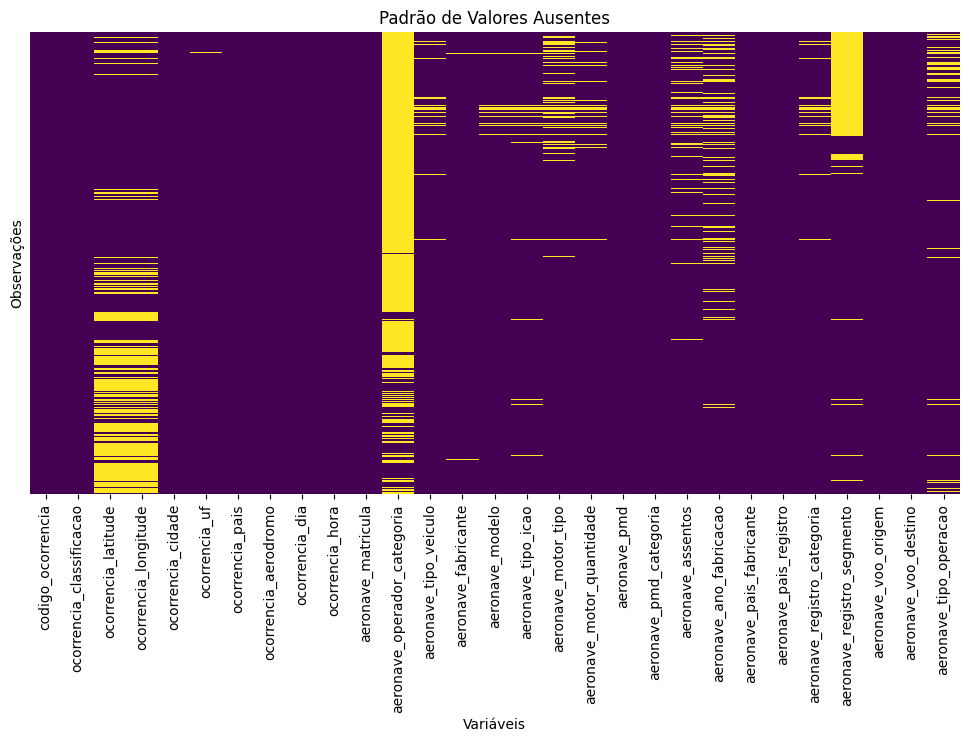

In [4]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_merged.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Padrão de Valores Ausentes')
plt.xlabel('Variáveis')
plt.ylabel('Observações')
plt.show()

<Figure size 1200x600 with 0 Axes>

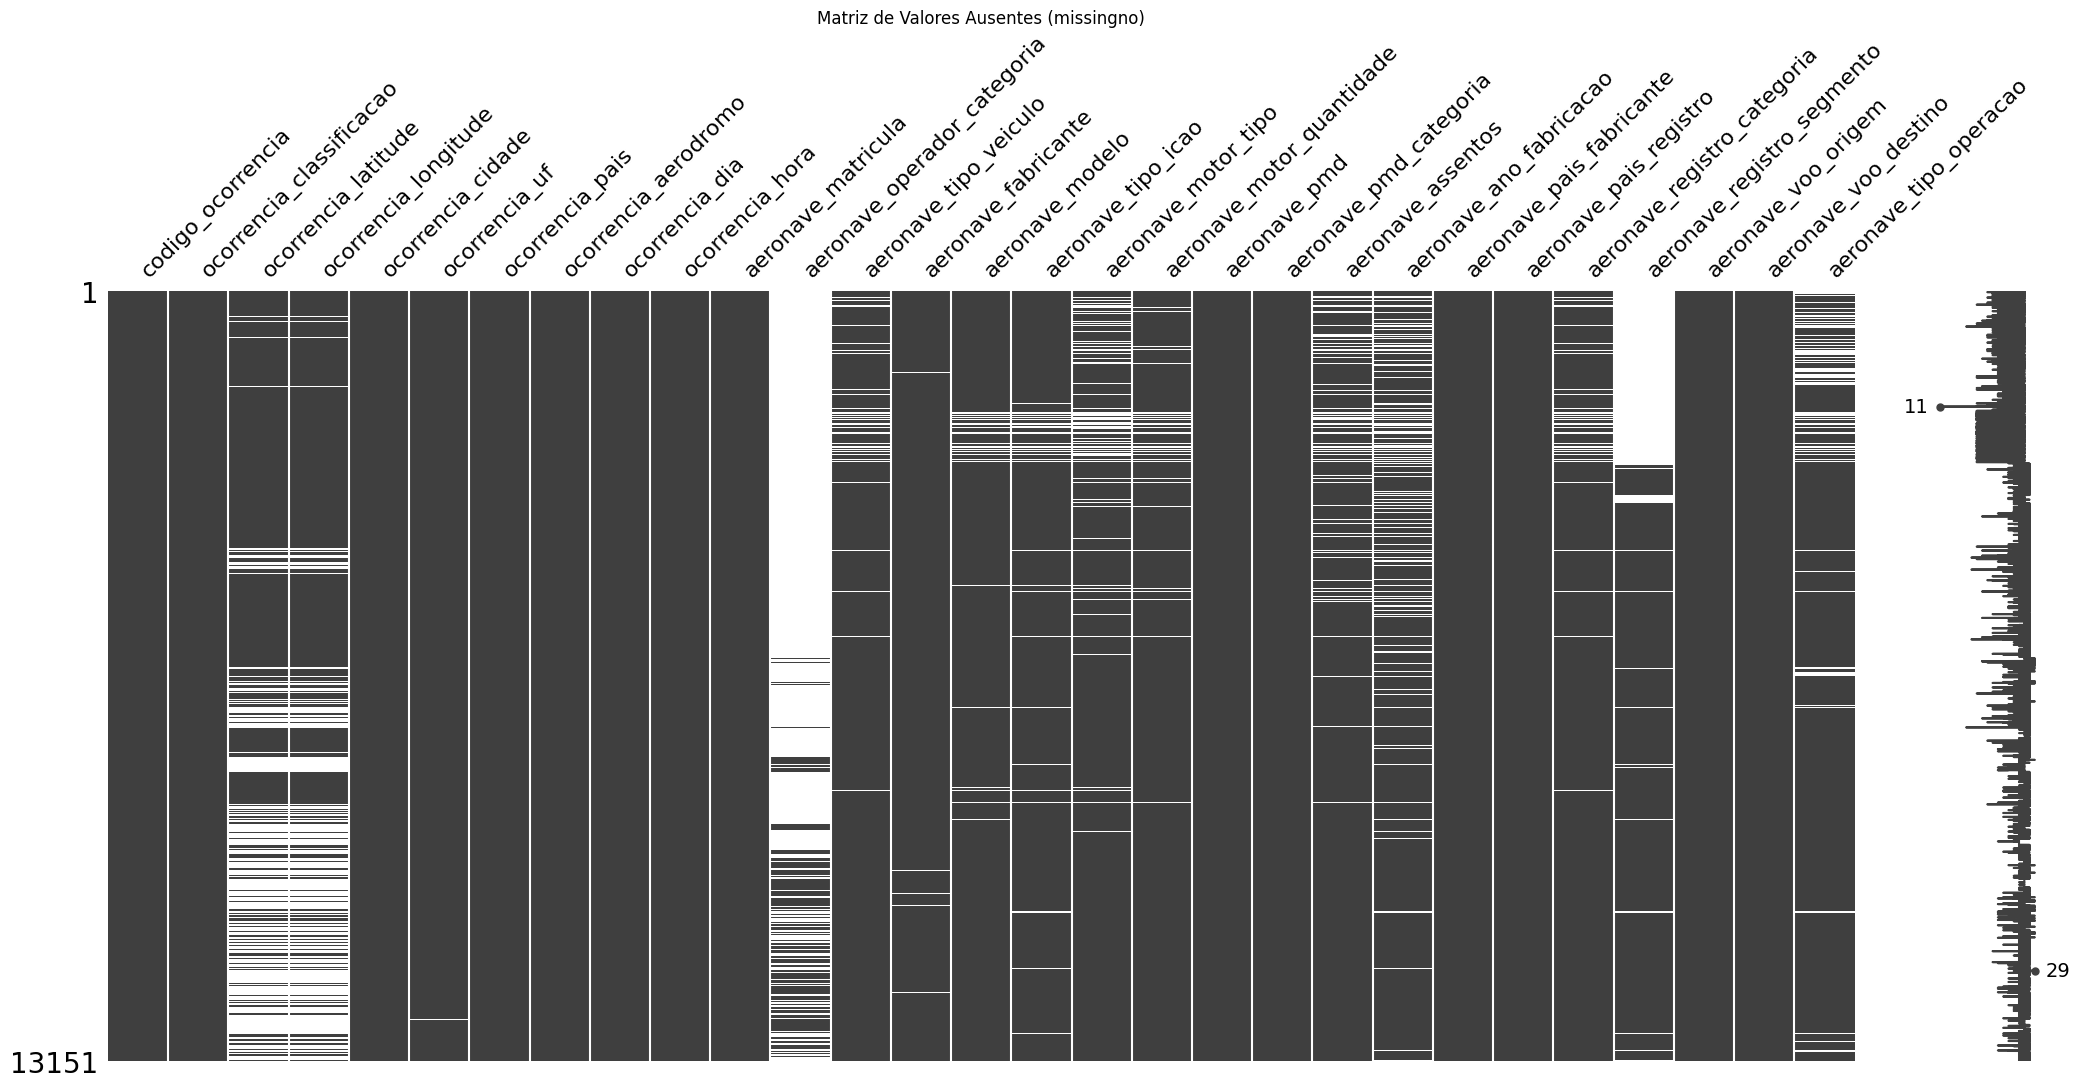

In [5]:
plt.figure(figsize=(12, 6))
msno.matrix(df_merged)
plt.title('Matriz de Valores Ausentes (missingno)')
plt.show()

<Figure size 1000x800 with 0 Axes>

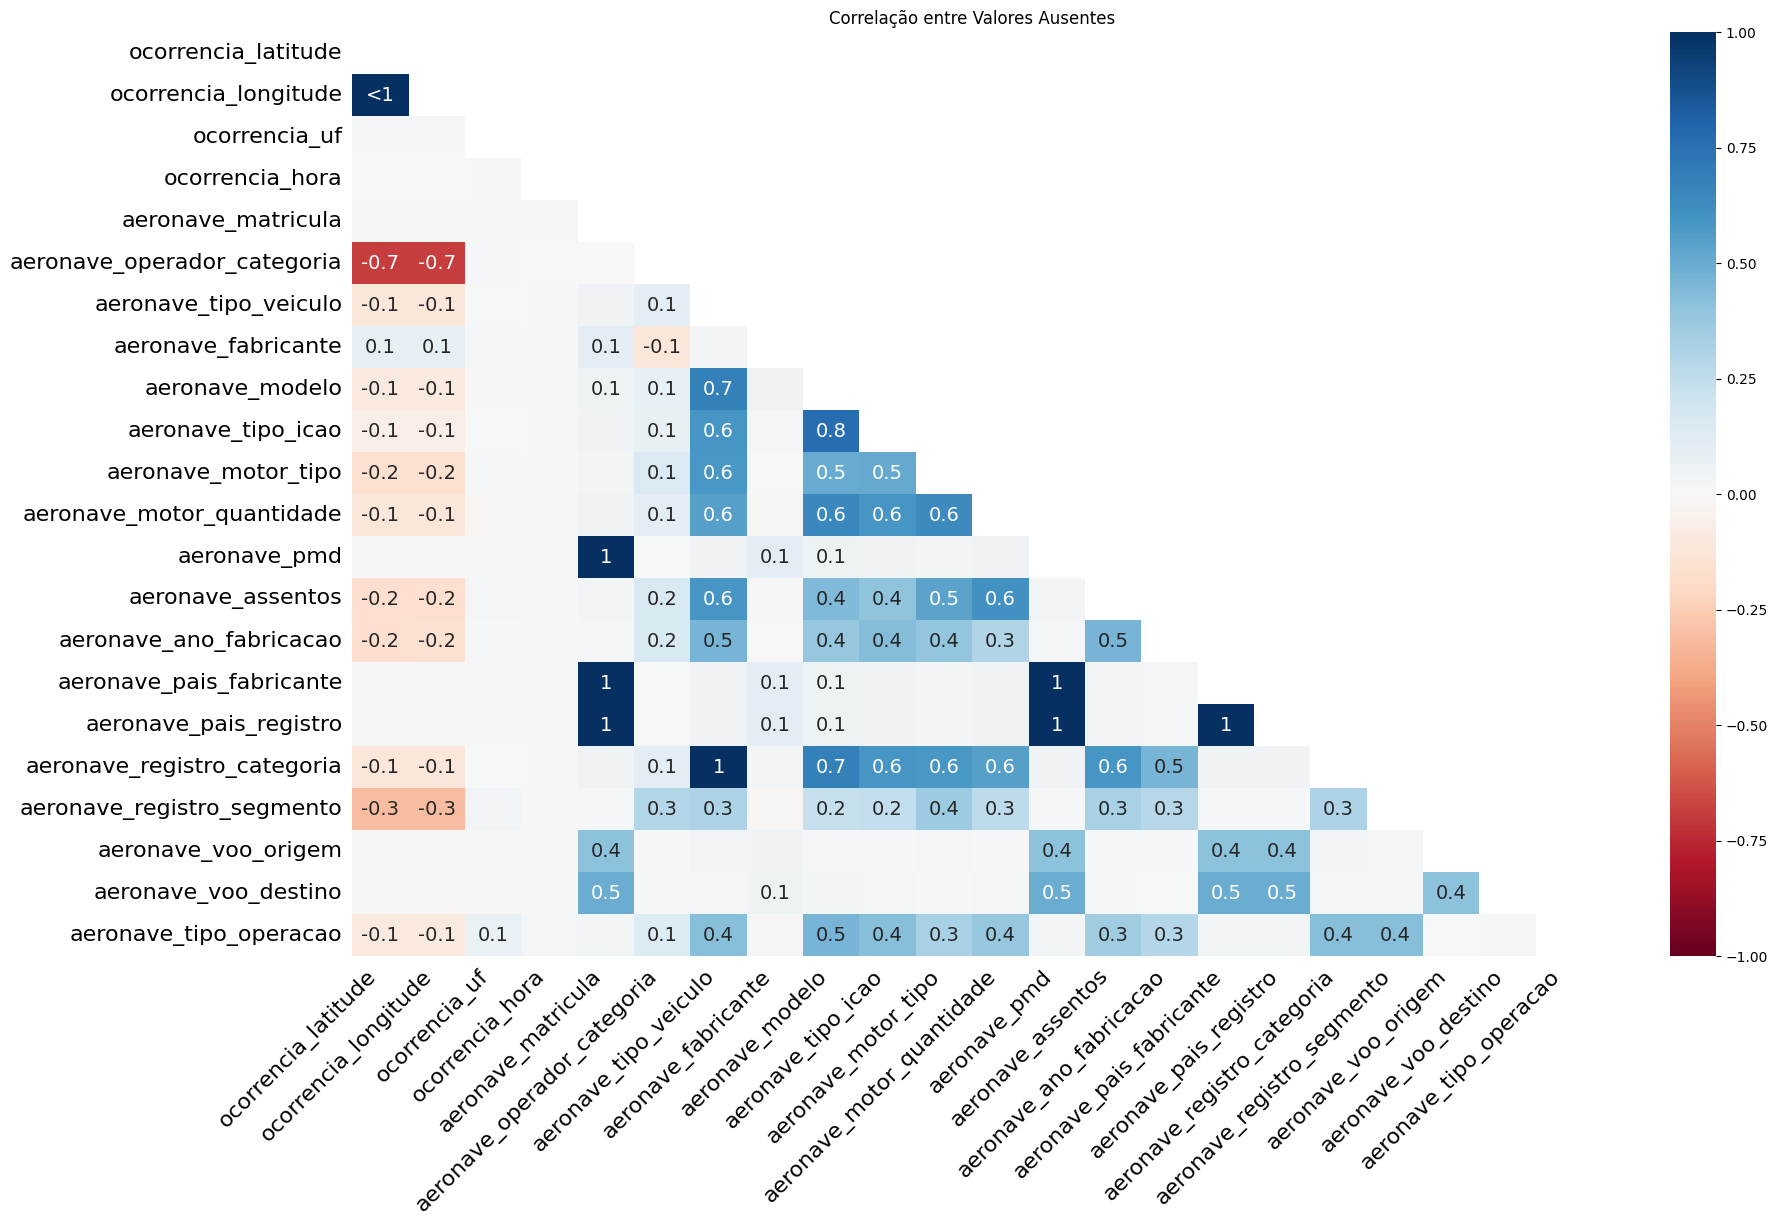

In [6]:
plt.figure(figsize=(10, 8))
msno.heatmap(df_merged)
plt.title('Correlação entre Valores Ausentes')
plt.show()

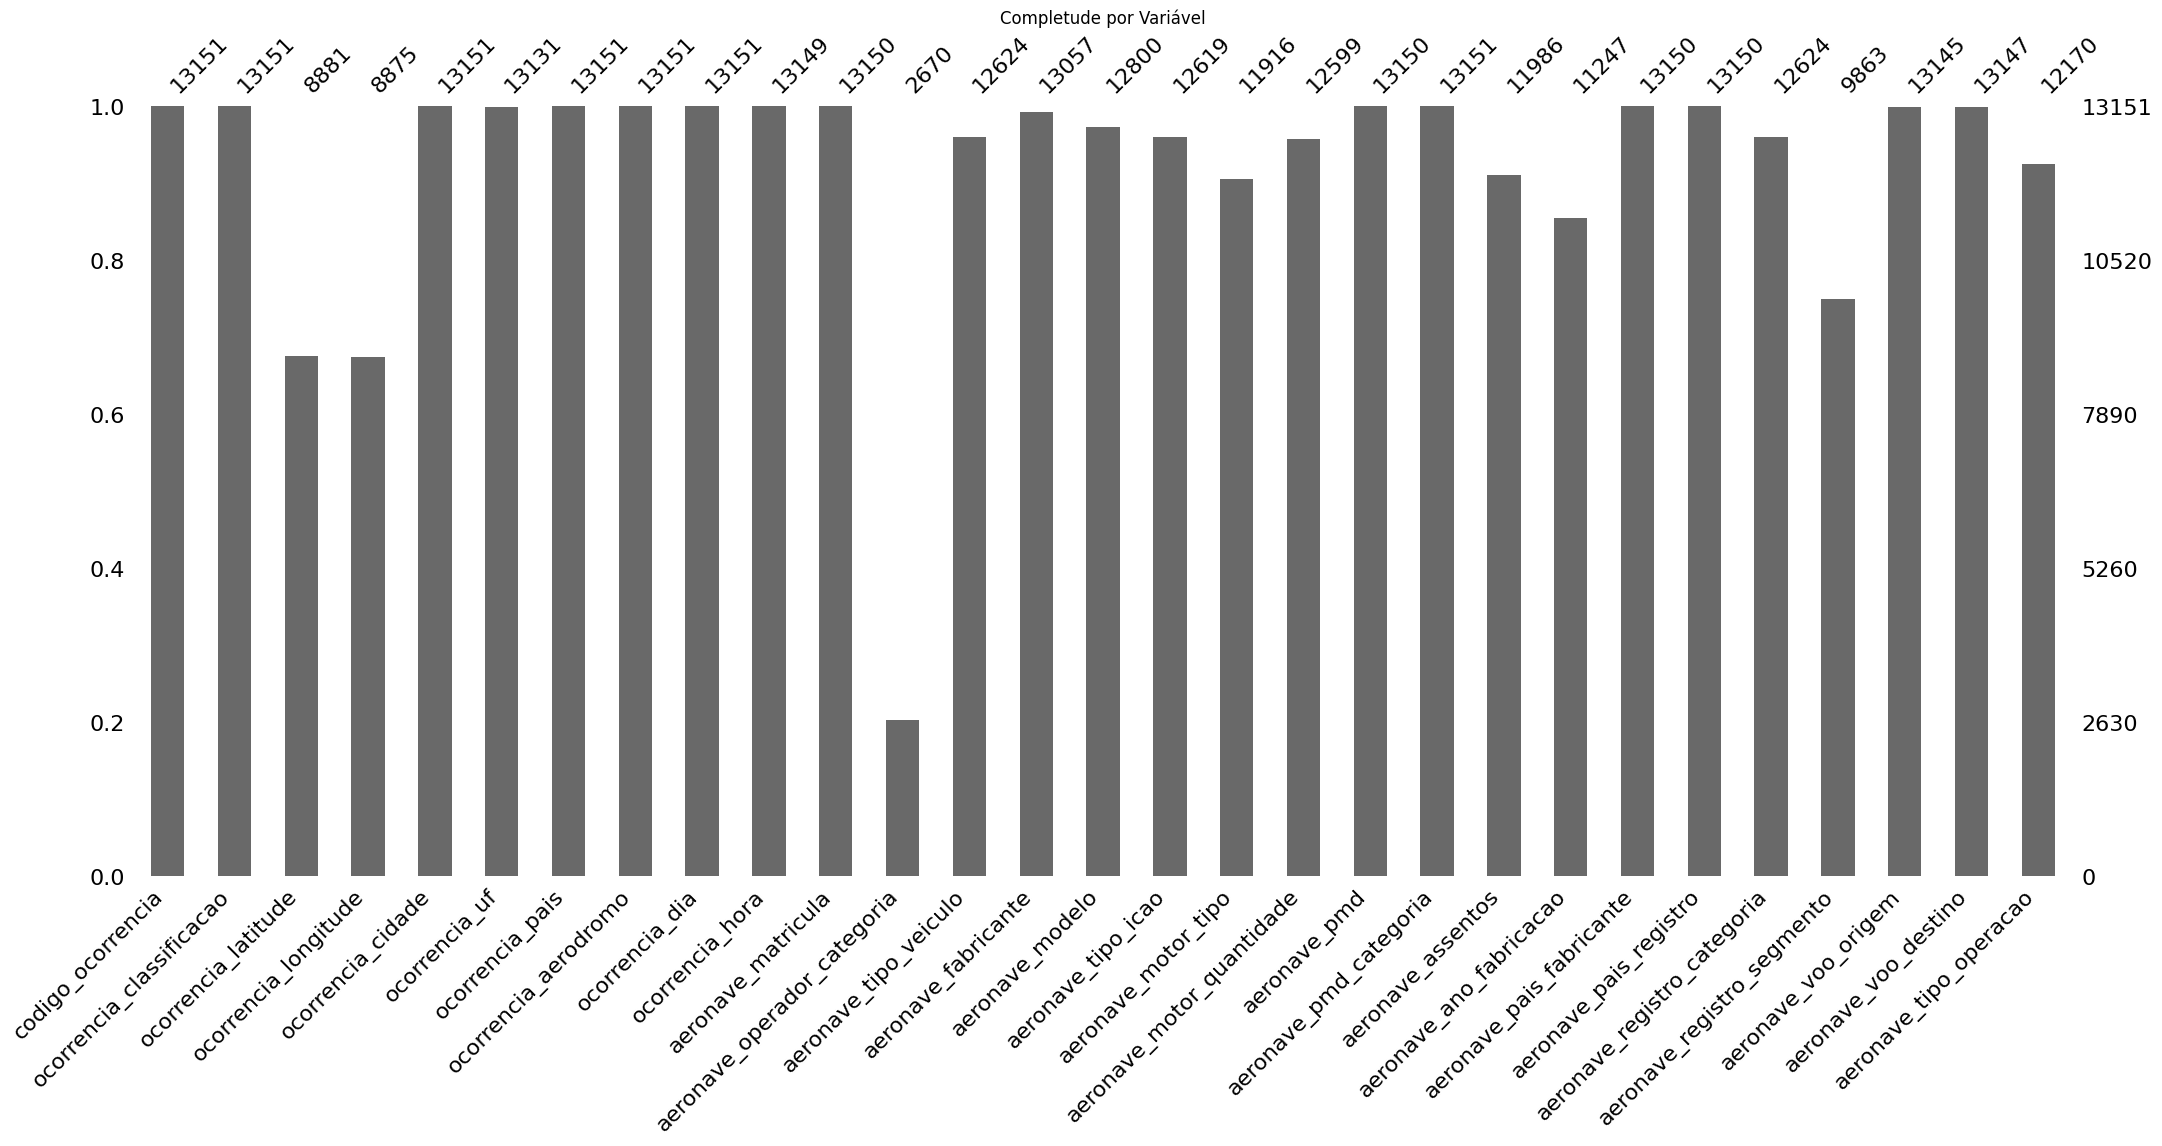

In [7]:
plt.figure(figsize=(12, 6))
msno.bar(df_merged)
plt.title('Completude por Variável')
plt.show()

### 1.2 Identificando tipos de valores ausentes

Classificamos os valores ausentes entre:

- `MCAR`: a ausência não depende de nenhuma variável
- `MAR`: a ausência está relacionada a outras variáveis observadas
- `MNAR`: a ausência está relacionada ao próprio valor ausente

In [8]:
df_temp = df_merged.copy()

colunas_com_ausencia = df_temp.columns[df_temp.isnull().any()].tolist()

colunas_categoricas = df_temp.select_dtypes(include='object').columns.tolist()
colunas_categoricas = [col for col in colunas_categoricas if df_temp[col].nunique() < 50]

resultados_categoricos = []

In [9]:
for var_ausente in colunas_com_ausencia:
    df_temp['ausente'] = df_temp[var_ausente].isnull()

    for var_cat in colunas_categoricas:
        if var_cat == var_ausente:
            continue

        cont_table = pd.crosstab(df_temp[var_cat], df_temp['ausente'])

        if cont_table.shape[0] < 2 or cont_table.shape[1] < 2:
            continue

        chi2, p, dof, expected = chi2_contingency(cont_table)
        conclusao = "Provavelmente MAR ou MNAR" if p < 0.05 else "Pode ser MCAR"

        resultados_categoricos.append({
            'variavel_com_ausencia': var_ausente,
            'variavel_categorica': var_cat,
            'p_valor': round(p, 4),
            'conclusao': conclusao
        })

In [10]:
resultado_df_cat = pd.DataFrame(resultados_categoricos)
resultado_df_cat = resultado_df_cat.sort_values(by='p_valor')
display(resultado_df_cat)

,variavel_com_ausencia,variavel_categorica,p_valor,conclusao
0,ocorrencia_latitude,ocorrencia_classificacao,0.0,Provavelmente MAR ou MNAR
117,aeronave_motor_quantidade,ocorrencia_uf,0.0,Provavelmente MAR ou MNAR
118,aeronave_motor_quantidade,aeronave_tipo_veiculo,0.0,Provavelmente MAR ou MNAR
120,aeronave_motor_quantidade,aeronave_pmd_categoria,0.0,Provavelmente MAR ou MNAR
123,aeronave_motor_quantidade,aeronave_registro_categoria,0.0,Provavelmente MAR ou MNAR
...,...,...,...,...
191,aeronave_voo_destino,aeronave_tipo_veiculo,1.0,Pode ser MCAR
76,aeronave_fabricante,aeronave_pais_fabricante,1.0,Pode ser MCAR
185,aeronave_voo_origem,aeronave_pais_registro,1.0,Pode ser MCAR
41,ocorrencia_hora,aeronave_pais_fabricante,1.0,Pode ser MCAR


Separando listas com base nas classificações feitas

Removemos a coluna `aeronave_modelo` para fazer uma abordagem manual dela.

In [11]:
mcar_vars = resultado_df_cat[resultado_df_cat['conclusao'] == 'Pode ser MCAR']['variavel_com_ausencia'].unique()
mar_mnar_vars = resultado_df_cat[resultado_df_cat['conclusao'] == 'Provavelmente MAR ou MNAR']['variavel_com_ausencia'].unique()

mcar_vars = np.setdiff1d(mcar_vars, ['aeronave_modelo'])
mar_mnar_vars = np.setdiff1d(mar_mnar_vars, ['aeronave_modelo'])

df_tratado = df_merged.copy()

### 1.3 Tratando MCAR

Para os valores ausentes do tipo MCAR, os substituímos por `UNKNOWN`

In [12]:
for col in mcar_vars:
    if col == 'aeronave_modelo':
        continue
    elif col in df_tratado.columns and df_tratado[col].dtype == 'object':  
        df_tratado[col] = df_tratado[col].fillna('UNKNOWN')

display(df_tratado)

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,...,aeronave_pmd_categoria,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_tipo_operacao
0,86954,ACIDENTE,-29.085556,-53.865556,TUPANCIRETÃ,RS,BRASIL,SIPJ,04/04/2025,17:20:00,...,Leve,4.0,1990.0,BRASIL,BRASIL,AVIÃO,NaN,Aero Parque TupÃ£,SANTA MARIA,PRIVADA
1,86953,ACIDENTE,-9.596944,-35.969722,PILAR,AL,BRASIL,FAER,04/04/2025,09:05:00,...,Leve,1.0,2010.0,BRASIL,BRASIL,AVIÃO,NaN,FORA DE AERODROMO,FORA DE AERODROMO,AGRÃCOLA
2,86952,INCIDENTE,-2.586944,-44.236111,SÃO LUÃS,MA,BRASIL,SBSL,03/04/2025,20:45:00,...,Leve,NaN,2014.0,BRASIL,BRASIL,AVIÃO,NaN,AERODROMO DE PARAGOMINAS,MARECHAL CUNHA MACHADO,EXPERIMENTAL
3,86951,INCIDENTE GRAVE,-27.133889,-52.658889,CHAPECÃ,SC,BRASIL,SBCH,31/03/2025,22:30:00,...,Pesado,154.0,2011.0,BRASIL,BRASIL,AVIÃO,NaN,GOVERNADOR ANDRÃ FRANCO MONTORO,SERAFIN ENOSS BERTASO,REGULAR
4,86950,INCIDENTE,-23.435556,-46.473056,GUARULHOS,SP,BRASIL,SBGR,05/04/2025,11:00:00,...,Pesado,0.0,2021.0,BRASIL,BRASIL,AVIÃO,NaN,SENADOR PETRÃNIO PORTELLA,GOVERNADOR ANDRÃ FRANCO MONTORO,REGULAR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13146,28377,ACIDENTE,NaN,NaN,IMPERATRIZ,MA,BRASIL,FAER,27/01/2007,11:18:00,...,Leve,4.0,1970.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,PREFEITO RENATO MOREIRA,COMANDANTE CARLOS INÃCIO AGNES,PRIVADA
13147,28375,ACIDENTE,-23.612222,-51.385000,APUCARANA,PR,BRASIL,FAER,26/01/2007,18:15:00,...,MÃ©dio,11.0,2006.0,BRASIL,BRASIL,AVIÃO,TÃXI AÃREO,CAPITÃO JOÃO BUSSE,CONGONHAS,TÃXI AÃREO
13148,28355,ACIDENTE,-17.254167,-43.853611,BOCAIÃVA,MG,BRASIL,FAER,18/01/2007,09:10:00,...,Leve,6.0,1966.0,BRASIL,BRASIL,AVIÃO,TÃXI AÃREO,CARLOS DRUMMOND DE ANDRADE / PAMPULHA,MÃRIO RIBEIRO,TÃXI AÃREO
13149,28335,ACIDENTE,-23.344444,-51.063333,LONDRINA,PR,BRASIL,FAER,19/01/2007,12:30:00,...,Leve,6.0,1986.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,PROFESSOR ERIBERTO MANOEL REINO,GOVERNADOR JOSÃ RICHA,PRIVADA


### 1.4 Tratando MAR/MNAR

Para os valores ausentes do tipo MAR e MNAR, usamos o método de Imputação Simples.

In [13]:
colunas_categoricas = df_tratado.select_dtypes(include='object').columns
mar_mnar_cat = [col for col in mar_mnar_vars if col in colunas_categoricas]

encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

outras_colunas = df_tratado.select_dtypes(include='object').columns.tolist()
colunas_para_usar = list(set(mar_mnar_cat + outras_colunas))

df_cat = df_tratado[colunas_para_usar].copy()

df_encoded = pd.DataFrame(encoder.fit_transform(df_cat), columns=colunas_para_usar)

imputer = SimpleImputer()
df_imputado = pd.DataFrame(imputer.fit_transform(df_encoded), columns=colunas_para_usar)

df_imputado_rounded = df_imputado.round(0)
df_final = pd.DataFrame(encoder.inverse_transform(df_imputado_rounded), columns=colunas_para_usar)

for col in mar_mnar_cat:
    df_tratado[col] = df_final[col]

display(df_tratado)

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,...,aeronave_pmd_categoria,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_tipo_operacao
0,86954,ACIDENTE,-29.085556,-53.865556,TUPANCIRETÃ,RS,BRASIL,SIPJ,04/04/2025,17:20:00,...,Leve,4.0,1990.0,BRASIL,BRASIL,AVIÃO,NÃO REGULAR,Aero Parque TupÃ£,SANTA MARIA,PRIVADA
1,86953,ACIDENTE,-9.596944,-35.969722,PILAR,AL,BRASIL,FAER,04/04/2025,09:05:00,...,Leve,1.0,2010.0,BRASIL,BRASIL,AVIÃO,NÃO REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,AGRÃCOLA
2,86952,INCIDENTE,-2.586944,-44.236111,SÃO LUÃS,MA,BRASIL,SBSL,03/04/2025,20:45:00,...,Leve,NaN,2014.0,BRASIL,BRASIL,AVIÃO,NÃO REGULAR,AERODROMO DE PARAGOMINAS,MARECHAL CUNHA MACHADO,EXPERIMENTAL
3,86951,INCIDENTE GRAVE,-27.133889,-52.658889,CHAPECÃ,SC,BRASIL,SBCH,31/03/2025,22:30:00,...,Pesado,154.0,2011.0,BRASIL,BRASIL,AVIÃO,NÃO REGULAR,GOVERNADOR ANDRÃ FRANCO MONTORO,SERAFIN ENOSS BERTASO,REGULAR
4,86950,INCIDENTE,-23.435556,-46.473056,GUARULHOS,SP,BRASIL,SBGR,05/04/2025,11:00:00,...,Pesado,0.0,2021.0,BRASIL,BRASIL,AVIÃO,NÃO REGULAR,SENADOR PETRÃNIO PORTELLA,GOVERNADOR ANDRÃ FRANCO MONTORO,REGULAR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13146,28377,ACIDENTE,NaN,NaN,IMPERATRIZ,MA,BRASIL,FAER,27/01/2007,11:18:00,...,Leve,4.0,1970.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,PREFEITO RENATO MOREIRA,COMANDANTE CARLOS INÃCIO AGNES,PRIVADA
13147,28375,ACIDENTE,-23.612222,-51.385000,APUCARANA,PR,BRASIL,FAER,26/01/2007,18:15:00,...,MÃ©dio,11.0,2006.0,BRASIL,BRASIL,AVIÃO,TÃXI AÃREO,CAPITÃO JOÃO BUSSE,CONGONHAS,TÃXI AÃREO
13148,28355,ACIDENTE,-17.254167,-43.853611,BOCAIÃVA,MG,BRASIL,FAER,18/01/2007,09:10:00,...,Leve,6.0,1966.0,BRASIL,BRASIL,AVIÃO,TÃXI AÃREO,CARLOS DRUMMOND DE ANDRADE / PAMPULHA,MÃRIO RIBEIRO,TÃXI AÃREO
13149,28335,ACIDENTE,-23.344444,-51.063333,LONDRINA,PR,BRASIL,FAER,19/01/2007,12:30:00,...,Leve,6.0,1986.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,PROFESSOR ERIBERTO MANOEL REINO,GOVERNADOR JOSÃ RICHA,PRIVADA


Visualizando novamente a quantidade de valores ausentes

In [14]:
missing_values = df_tratado.isnull().sum()
missing_percent = (missing_values / len(df_tratado)) * 100

missing_df = pd.DataFrame({
    'Total Ausentes': missing_values,
    'Percentual (%)': missing_percent
})

print("\nResumo de valores ausentes por coluna:")
print(missing_df[missing_df['Total Ausentes'] > 0].sort_values('Percentual (%)', ascending=False))


Resumo de valores ausentes por coluna:
                         Total Ausentes  Percentual (%)
ocorrencia_longitude               4276       32.514638
ocorrencia_latitude                4270       32.469014
aeronave_ano_fabricacao            1904       14.477986
aeronave_assentos                  1165        8.858642
aeronave_modelo                     351        2.668999
aeronave_pmd                          1        0.007604


### 1.5 Tratando manualmente os que continuam ausentes

Percebemos que alguns valores não foram devidamente tratados, então substituímos os valores manualmente com uma abordagem diferente.

---

Para `aeronave_assentos`, calculamos a média de quantos assentos cada fabricante possui.

Para `aeronave_ano_fabricacao`, calculamos a média dos anos de fabricação de cada fabricante.

In [15]:
indices_nulos = df_tratado[df_tratado['aeronave_assentos'].isna()].index

display("ANTES:")
display(df_tratado.loc[indices_nulos, ['aeronave_fabricante', 'aeronave_assentos', 'aeronave_ano_fabricacao']])

media_geral = round(df_tratado['aeronave_assentos'].mean())
df_tratado['aeronave_assentos'] = df_tratado.groupby('aeronave_fabricante')['aeronave_assentos'].transform(
    lambda x: x.fillna(round(x.mean()) if not pd.isna(x.mean()) else media_geral)
)

media_geral = round(df_tratado['aeronave_ano_fabricacao'].mean())
df_tratado['aeronave_ano_fabricacao'] = df_tratado.groupby('aeronave_fabricante')['aeronave_ano_fabricacao'].transform(
    lambda x: x.fillna(round(x.mean())  if not pd.isna(x.mean()) else media_geral)
)

display("DEPOIS - Linhas que antes tinham valores nulos:")
display(df_tratado.loc[indices_nulos,['aeronave_fabricante', 'aeronave_assentos', 'aeronave_ano_fabricacao']])

'ANTES:'

,aeronave_fabricante,aeronave_assentos,aeronave_ano_fabricacao
2,INPAER - IndÃºstria Paulista de AeronÃ¡utica,NaN,2014.0
9,ISRAEL AIRCRAFT,NaN,NaN
10,AGUSTA,NaN,NaN
11,LEONARDO S.P.A,NaN,2014.0
17,BOEING,NaN,NaN
...,...,...,...
8871,BOEING,NaN,1999.0
8980,ROCKWELL,NaN,NaN
10470,HELIBRAS,NaN,NaN
11645,BOEING COMPANY,NaN,2010.0


'DEPOIS - Linhas que antes tinham valores nulos:'

,aeronave_fabricante,aeronave_assentos,aeronave_ano_fabricacao
2,INPAER - IndÃºstria Paulista de AeronÃ¡utica,48.0,2014.0
9,ISRAEL AIRCRAFT,10.0,1990.0
10,AGUSTA,12.0,2008.0
11,LEONARDO S.P.A,14.0,2014.0
17,BOEING,110.0,2003.0
...,...,...,...
8871,BOEING,110.0,1999.0
8980,ROCKWELL,0.0,1997.0
10470,HELIBRAS,6.0,2002.0
11645,BOEING COMPANY,85.0,2010.0


Para `aeronave_pmd`, retiramos a linha em que essa coluna estava nula.

Optamos por retirar a linha pois percebemos que ela possui outras informações faltantes.

In [16]:
display(df_tratado[df_tratado['aeronave_pmd'].isna()])
idx = df_tratado[df_tratado['aeronave_pmd'].isna()].index
df_tratado = df_tratado.drop(index=idx)

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,...,aeronave_pmd_categoria,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_tipo_operacao
1974,84592,INCIDENTE,-9.510833,-35.791667,MACEIÃ,AL,BRASIL,SBMO,18/04/2024,20:37:00,...,Desconhecido,2.0,2002.0,UNKNOWN,UNKNOWN,UNKNOWN,NÃO REGULAR,UNKNOWN,UNKNOWN,UNKNOWN


### Tratando ocorrencia_latitude e ocorrencia_longitude

In [17]:
coordenadas_por_cidade = df_tratado.groupby('ocorrencia_cidade').agg({
    'ocorrencia_latitude': ['min', 'max'],
    'ocorrencia_longitude': ['min', 'max']
}).reset_index()

coordenadas_por_cidade.columns = [
    'cidade', 
    'latitude_min', 'latitude_max', 
    'longitude_min', 'longitude_max'
]

lat_lookup = coordenadas_por_cidade.set_index('cidade')[['latitude_min', 'latitude_max']].to_dict('index')

def preencher_lat(row):
    if pd.isna(row['ocorrencia_latitude']):
        cidade = row['ocorrencia_cidade']
        if cidade in lat_lookup:
            lat_min = lat_lookup[cidade]['latitude_min']
            lat_max = lat_lookup[cidade]['latitude_max']
            return (lat_min + lat_max) / 2
    return row['ocorrencia_latitude']

df_tratado['ocorrencia_latitude'] = df_tratado.apply(preencher_lat, axis=1)

lon_lookup = coordenadas_por_cidade.set_index('cidade')[['longitude_min', 'longitude_max']].to_dict('index')

def preencher_lon(row):
    if pd.isna(row['ocorrencia_longitude']):
        cidade = row['ocorrencia_cidade']
        if cidade in lat_lookup:
            lat_min = lat_lookup[cidade]['longitude_min']
            lat_max = lat_lookup[cidade]['longitude_max']
            return (lat_min + lat_max) / 2
    return row['ocorrencia_longitude']

df_tratado['ocorrencia_longitude'] = df_tratado.apply(preencher_lat, axis=1)

display(df_tratado['ocorrencia_longitude'])

0       -29.085556
1        -9.596944
2        -2.586944
3       -27.133889
4       -23.435556
           ...    
13146    -5.460139
13147   -23.612222
13148   -17.254167
13149   -23.344444
13150   -22.218056
Name: ocorrencia_longitude, Length: 13150, dtype: float64

Verificando novamente a quantidade de valores ausentes

In [18]:
missing_values = df_tratado.isnull().sum()
missing_percent = (missing_values / len(df_tratado)) * 100

missing_df = pd.DataFrame({
    'Total Ausentes': missing_values,
    'Percentual (%)': missing_percent
})

print("\nResumo de valores ausentes por coluna DEPOIS:")
print(missing_df[missing_df['Total Ausentes'] > 0].sort_values('Percentual (%)', ascending=False))


Resumo de valores ausentes por coluna DEPOIS:
                      Total Ausentes  Percentual (%)
aeronave_modelo                  350        2.661597
ocorrencia_latitude              235        1.787072
ocorrencia_longitude             235        1.787072


Como ainda existem coordenadas que estão nulas vendo a cidade, passamos a analisar por estado.

In [19]:
coordenadas_por_uf = df_tratado.groupby('ocorrencia_uf').agg({
    'ocorrencia_latitude': ['min', 'max'],
    'ocorrencia_longitude': ['min', 'max']
}).reset_index()

coordenadas_por_uf.columns = [
    'uf', 
    'latitude_min', 'latitude_max', 
    'longitude_min', 'longitude_max'
]

lat_lookup_uf = coordenadas_por_uf.set_index('uf')[['latitude_min', 'latitude_max']].to_dict('index')
lon_lookup_uf = coordenadas_por_uf.set_index('uf')[['longitude_min', 'longitude_max']].to_dict('index')

def preencher_lat_uf(row):
    if pd.isna(row['ocorrencia_latitude']):
        uf = row['ocorrencia_uf']
        if uf in lat_lookup_uf:
            lat_min = lat_lookup_uf[uf]['latitude_min']
            lat_max = lat_lookup_uf[uf]['latitude_max']
            return (lat_min + lat_max) / 2
    return row['ocorrencia_latitude']

def preencher_lon_uf(row):
    if pd.isna(row['ocorrencia_longitude']):
        uf = row['ocorrencia_uf']
        if uf in lon_lookup_uf:
            lon_min = lon_lookup_uf[uf]['longitude_min']
            lon_max = lon_lookup_uf[uf]['longitude_max']
            return (lon_min + lon_max) / 2
    return row['ocorrencia_longitude']

df_tratado['ocorrencia_latitude'] = df_tratado.apply(preencher_lat_uf, axis=1)
df_tratado['ocorrencia_longitude'] = df_tratado.apply(preencher_lon_uf, axis=1)

Agora vamos tratar `aeronave_modelo` em relação à `aeronave_tipo_icao`.

In [20]:
modelo_por_icao = (
    df_tratado
    .dropna(subset=['aeronave_modelo'])  # só linhas com modelo conhecido
    .groupby('aeronave_tipo_icao')['aeronave_modelo']
    .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
    .to_dict()
)

def preencher_modelo(row):
    if pd.isna(row['aeronave_modelo']):
        tipo_icao = row['aeronave_tipo_icao']
        if tipo_icao in modelo_por_icao and pd.notna(modelo_por_icao[tipo_icao]):
            return modelo_por_icao[tipo_icao]
    return row['aeronave_modelo']

df_tratado['aeronave_modelo'] = df_tratado.apply(preencher_modelo, axis=1)

if df_tratado['aeronave_modelo'].isnull().sum() > 0:
    df_tratado['aeronave_modelo'] = df_tratado['aeronave_modelo'].fillna('UNKNOWN')

E agora, com todos os valores ausentes tratados, podemos ir para a próxima etapa.

In [21]:
missing_values = df_tratado.isnull().sum()
missing_percent = (missing_values / len(df_tratado)) * 100

missing_df = pd.DataFrame({
    'Total Ausentes': missing_values,
    'Percentual (%)': missing_percent
})

print("\nResumo de valores ausentes por coluna DEPOIS:")
print(missing_df[missing_df['Total Ausentes'] > 0].sort_values('Percentual (%)', ascending=False))


Resumo de valores ausentes por coluna DEPOIS:
Empty DataFrame
Columns: [Total Ausentes, Percentual (%)]
Index: []


In [29]:
# Extrair os últimos 4 caracteres de 'ocorrencia_dia' como ano
df_tratado['ocorrencia_ano'] = df_tratado['ocorrencia_dia'].str[-4:].astype(int)

# Adicionar a coluna 'idade' ao DataFrame
df_tratado['idade'] = df_tratado['ocorrencia_ano'] - df_tratado['aeronave_ano_fabricacao']

# Exibir as primeiras linhas para verificar
display(df_tratado[['ocorrencia_dia', 'ocorrencia_ano', 'aeronave_ano_fabricacao', 'idade']])

,ocorrencia_dia,ocorrencia_ano,aeronave_ano_fabricacao,idade
0,04/04/2025,2025,1990.0,35.0
1,04/04/2025,2025,2010.0,15.0
2,03/04/2025,2025,2014.0,11.0
3,31/03/2025,2025,2011.0,14.0
4,05/04/2025,2025,2021.0,4.0
...,...,...,...,...
13146,27/01/2007,2007,1970.0,37.0
13147,26/01/2007,2007,2006.0,1.0
13148,18/01/2007,2007,1966.0,41.0
13149,19/01/2007,2007,1986.0,21.0


# 2. Análise e tratamento de Outliers

Identificação de valores extremos: Valores com Z-Scores muito altos (positivos ou negativos) indicam possíveis outliers.

Útil para dados normalmente distribuídos: Essa abordagem assume que os dados seguem uma distribuição aproximadamente normal.

Padronização dos dados: O Z-Score transforma diferentes variáveis para uma escala comum, facilitando comparações.

In [23]:
possiveis_ids = ['codigo_ocorrencia']
colunas_numericas = [
    col for col in df_merged.select_dtypes(include=['float64','int']).columns
    if col not in possiveis_ids
]

print("\nDetecção de Outliers usando Z-Score:")
df_temp = df_tratado.copy()
for col in colunas_numericas:
    df_temp[f'zscore_{col}'] = zscore(df_temp[col])
    outliers = df_tratado[df_temp[f'zscore_{col}'].abs() > 3]
    print(f"Outliers detected in {col}:")
display(outliers)


Detecção de Outliers usando Z-Score:
Outliers detected in ocorrencia_latitude:
Outliers detected in ocorrencia_longitude:
Outliers detected in aeronave_pmd:
Outliers detected in aeronave_assentos:
Outliers detected in aeronave_ano_fabricacao:


,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,...,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_tipo_operacao,ocorrencia_ano,idade
1624,85029,ACIDENTE,-20.603889,-20.603889,CAMPO GRANDE,MS,BRASIL,SSIE,26/06/2024,13:30:00,...,1949.0,BRASIL,BRASIL,AVIÃO,NÃO REGULAR,TERUEL IPANEMA ESTÃNCIA,TERUEL IPANEMA ESTÃNCIA,INSTRUÃÃO,2,-1947.0
1712,84915,INCIDENTE GRAVE,-25.184444,-25.184444,PONTA GROSSA,PR,BRASIL,SBPG,14/06/2024,14:45:00,...,1931.0,BRASIL,BRASIL,AVIÃO,NÃO REGULAR,MAX FONTOURA,COMANDANTE ANTONIO AMILTON BERALDO,EXPERIMENTAL,2,-1929.0
2211,84273,INCIDENTE,-22.890472,-22.890472,PINDAMONHANGABA,SP,BRASIL,SDZH,20/04/2024,20:00:00,...,1950.0,BRASIL,BRASIL,AVIÃO,NÃO REGULAR,PINDAMONHANGABA,PINDAMONHANGABA,PRIVADA,2,-1948.0
4137,82008,ACIDENTE,-24.567778,-24.567778,DOUTOR ULYSSES,PR,BRASIL,FAER,17/09/2023,12:30:00,...,1948.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,SIQUEIRA CAMPOS,SIQUEIRA CAMPOS,PRIVADA,2,-1946.0
4194,81943,INCIDENTE,-21.793056,-21.793056,JUIZ DE FORA,MG,BRASIL,SBJF,24/08/2023,15:20:00,...,1946.0,BRASIL,BRASIL,AVIÃO,INSTRUÃÃO,FRANCISCO DE ASSIS,FRANCISCO DE ASSIS,INSTRUÃÃO,2,-1944.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12727,34915,ACIDENTE,0.000000,0.000000,JAGUARIÃNA,SP,BRASIL,FAER,04/02/2009,10:40:00,...,1940.0,BRASIL,BRASIL,AVIÃO,INSTRUÃÃO,FORA DE AERODROMO,FORA DE AERODROMO,INSTRUÃÃO,2,-1938.0
12873,33221,ACIDENTE,-23.233056,-23.233056,SOROCABA,SP,BRASIL,SDCO,09/07/2008,13:00:00,...,1947.0,BRASIL,BRASIL,AVIÃO,INSTRUÃÃO,FORA DE AERODROMO,FORA DE AERODROMO,INSTRUÃÃO,2,-1945.0
12899,32615,ACIDENTE,-20.600834,-20.600834,CAMPO GRANDE,MS,BRASIL,SSKG,10/06/2008,20:00:00,...,1949.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,PRIVADA,2,-1947.0
13096,29861,ACIDENTE,-22.988333,-22.988333,RIO DE JANEIRO,RJ,BRASIL,FAER,21/07/2007,18:20:00,...,1948.0,BRASIL,BRASIL,AVIÃO,ESPECIALIZADA,JACAREPAGUÃ,FORA DE AERODROMO,ESPECIALIZADA,2,-1946.0


### 2.1 Detecção de Outliers usando IQR (Intervalo Interquartil)
Robustez a distribuições não normais: O IQR não depende da média ou do desvio padrão, o que o torna mais confiável em dados que não seguem uma distribuição normal.

Simples e eficiente: A lógica baseada nos quartis torna o método fácil de implementar e entender.

Redução de ruídos: Ao identificar e tratar outliers, podemos melhorar a qualidade das análises, previsões e visualizações dos dados.

In [24]:
print("\nDetecção de Outliers usando IQR:")
for col in colunas_numericas:
    Q1 = df_tratado[col].quantile(0.25)
    Q3 = df_tratado[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_tratado[(df_tratado[col] < lower_bound) | (df_tratado[col] > upper_bound)]
    print(f"Outliers detectados em {col} usando IQR:")
    display(outliers)


Detecção de Outliers usando IQR:
Outliers detectados em ocorrencia_latitude usando IQR:


,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,...,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_tipo_operacao,ocorrencia_ano,idade
72,86865,INCIDENTE,-105.786944,-105.786944,SÃO PAULO,SP,BRASIL,FAER,20/03/2025,19:00:00,...,2013.0,BRASIL,BRASIL,HELICÃPTERO,NÃO REGULAR,JACAREPAGUÃ,FORA DE AERODROMO,TÃXI AÃREO,2,-2011.0
201,86636,INCIDENTE,-126.029583,-126.029583,MANGARATIBA,RJ,BRASIL,NCAD,25/02/2025,12:00:00,...,2009.0,BRASIL,BRASIL,HELICÃPTERO,NÃO REGULAR,JACAREPAGUÃ,AERÃDROMO NÃO CADASTRADO,TÃXI AÃREO,2,-2007.0
210,86627,INCIDENTE,-102.846000,-102.846000,RIO DE JANEIRO,RJ,BRASIL,FAER,22/02/2025,11:45:00,...,2013.0,BRASIL,BRASIL,HELICÃPTERO,NÃO REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,TÃXI AÃREO,2,-2011.0
251,86579,INCIDENTE GRAVE,-102.846000,-102.846000,RIO DE JANEIRO,RJ,BRASIL,FAER,20/02/2025,13:00:00,...,2015.0,BRASIL,BRASIL,HELICÃPTERO,NÃO REGULAR,JACAREPAGUÃ,FORA DE AERODROMO,TÃXI AÃREO,2,-2013.0
297,86532,INCIDENTE,-105.786944,-105.786944,SÃO PAULO,SP,BRASIL,FAER,12/02/2025,01:45:00,...,2018.0,BRASIL,BRASIL,AVIÃO,NÃO REGULAR,PRESIDENTE JUSCELINO KUBITSCHEK,CONGONHAS,REGULAR,2,-2016.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13109,29677,INCIDENTE GRAVE,-47.874222,-47.874222,SÃO JOSÃ DOS CAMPOS,SP,BRASIL,SBSJ,27/04/2007,17:00:00,...,1997.0,BRASIL,BRASIL,HELICÃPTERO,TÃXI AÃREO,FORA DE AERODROMO,FORA DE AERODROMO,TÃXI AÃREO,2,-1995.0
13112,29635,INCIDENTE,-105.786944,-105.786944,SÃO PAULO,SP,BRASIL,FAER,24/06/2007,02:31:00,...,2001.0,BRASIL,BRASIL,AVIÃO,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,REGULAR,2,-1999.0
13115,29595,INCIDENTE,-105.786944,-105.786944,SÃO PAULO,SP,BRASIL,FAER,24/06/2007,02:47:00,...,2002.0,BRASIL,BRASIL,AVIÃO,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,REGULAR,2,-2000.0
13131,28815,ACIDENTE,-73.557917,-73.557917,FERROS,MG,BRASIL,FAER,07/04/2007,12:30:00,...,1964.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,PRIVADA,2,-1962.0


Outliers detectados em ocorrencia_longitude usando IQR:


,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,...,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_tipo_operacao,ocorrencia_ano,idade
72,86865,INCIDENTE,-105.786944,-105.786944,SÃO PAULO,SP,BRASIL,FAER,20/03/2025,19:00:00,...,2013.0,BRASIL,BRASIL,HELICÃPTERO,NÃO REGULAR,JACAREPAGUÃ,FORA DE AERODROMO,TÃXI AÃREO,2,-2011.0
201,86636,INCIDENTE,-126.029583,-126.029583,MANGARATIBA,RJ,BRASIL,NCAD,25/02/2025,12:00:00,...,2009.0,BRASIL,BRASIL,HELICÃPTERO,NÃO REGULAR,JACAREPAGUÃ,AERÃDROMO NÃO CADASTRADO,TÃXI AÃREO,2,-2007.0
210,86627,INCIDENTE,-102.846000,-102.846000,RIO DE JANEIRO,RJ,BRASIL,FAER,22/02/2025,11:45:00,...,2013.0,BRASIL,BRASIL,HELICÃPTERO,NÃO REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,TÃXI AÃREO,2,-2011.0
251,86579,INCIDENTE GRAVE,-102.846000,-102.846000,RIO DE JANEIRO,RJ,BRASIL,FAER,20/02/2025,13:00:00,...,2015.0,BRASIL,BRASIL,HELICÃPTERO,NÃO REGULAR,JACAREPAGUÃ,FORA DE AERODROMO,TÃXI AÃREO,2,-2013.0
297,86532,INCIDENTE,-105.786944,-105.786944,SÃO PAULO,SP,BRASIL,FAER,12/02/2025,01:45:00,...,2018.0,BRASIL,BRASIL,AVIÃO,NÃO REGULAR,PRESIDENTE JUSCELINO KUBITSCHEK,CONGONHAS,REGULAR,2,-2016.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13109,29677,INCIDENTE GRAVE,-47.874222,-47.874222,SÃO JOSÃ DOS CAMPOS,SP,BRASIL,SBSJ,27/04/2007,17:00:00,...,1997.0,BRASIL,BRASIL,HELICÃPTERO,TÃXI AÃREO,FORA DE AERODROMO,FORA DE AERODROMO,TÃXI AÃREO,2,-1995.0
13112,29635,INCIDENTE,-105.786944,-105.786944,SÃO PAULO,SP,BRASIL,FAER,24/06/2007,02:31:00,...,2001.0,BRASIL,BRASIL,AVIÃO,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,REGULAR,2,-1999.0
13115,29595,INCIDENTE,-105.786944,-105.786944,SÃO PAULO,SP,BRASIL,FAER,24/06/2007,02:47:00,...,2002.0,BRASIL,BRASIL,AVIÃO,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,REGULAR,2,-2000.0
13131,28815,ACIDENTE,-73.557917,-73.557917,FERROS,MG,BRASIL,FAER,07/04/2007,12:30:00,...,1964.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,PRIVADA,2,-1962.0


Outliers detectados em aeronave_pmd usando IQR:


,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,...,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_tipo_operacao,ocorrencia_ano,idade
37,86905,INCIDENTE,-23.435556,-23.435556,GUARULHOS,SP,BRASIL,SBGR,19/02/2025,14:30:00,...,2008.0,BRASIL,BRASIL,AVIÃO,NÃO REGULAR,MALPENSA AIRPORT,GOVERNADOR ANDRÃ FRANCO MONTORO,REGULAR,2,-2006.0
61,86876,INCIDENTE,-23.435556,-23.435556,SÃO PAULO,SP,BRASIL,SBGR,19/03/2025,11:15:00,...,2012.0,BRASIL,BRASIL,AVIÃO,NÃO REGULAR,GOVERNADOR ANDRÃ FRANCO MONTORO,JORGE CHÃVEZ INTERNATIONAL AIRPORT,REGULAR,2,-2010.0
196,86641,INCIDENTE,-22.810000,-22.810000,RIO DE JANEIRO,RJ,BRASIL,SBGL,22/02/2025,20:27:00,...,1993.0,ESTADOS UNIDOS,ESTADOS UNIDOS,AVIÃO,NÃO REGULAR,ANTONIO CARLOS JOBIM / GALEÃO,ANTONIO CARLOS JOBIM / GALEÃO,UNKNOWN,2,-1991.0
231,86603,INCIDENTE,-23.435556,-23.435556,GUARULHOS,SP,BRASIL,SBGR,01/02/2025,18:45:00,...,2024.0,CHILE,CHILE,AVIÃO,NÃO REGULAR,AEROPORTO HUMBERTO DELGADO,GOVERNADOR ANDRÃ FRANCO MONTORO,REGULAR,2,-2022.0
236,86598,INCIDENTE,-23.435556,-23.435556,GUARULHOS,SP,BRASIL,SBGR,04/02/2025,18:45:00,...,2008.0,BRASIL,BRASIL,AVIÃO,NÃO REGULAR,AEROPORTO HUMBERTO DELGADO,GOVERNADOR ANDRÃ FRANCO MONTORO,REGULAR,2,-2006.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12971,31829,INCIDENTE,-11.717778,-11.717778,RECIFE,PE,BRASIL,SBRF,07/02/2007,23:35:00,...,2002.0,PORTUGAL,PORTUGAL,AVIÃO,NÃO REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,UNKNOWN,2,-2000.0
12974,31826,INCIDENTE,-11.717778,-11.717778,RECIFE,PE,BRASIL,SBRF,26/02/2007,22:45:00,...,1991.0,BRASIL,BRASIL,AVIÃO,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,REGULAR,2,-1989.0
12976,31824,INCIDENTE,-11.717778,-11.717778,RECIFE,PE,BRASIL,SBRF,09/03/2007,18:15:00,...,1992.0,BRASIL,BRASIL,AVIÃO,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,REGULAR,2,-1990.0
12988,31779,INCIDENTE,-15.713889,-15.713889,SALVADOR,BA,BRASIL,SBSV,25/06/2007,05:25:00,...,1992.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,UNKNOWN,2,-1990.0


Outliers detectados em aeronave_assentos usando IQR:


,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,...,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_tipo_operacao,ocorrencia_ano,idade
37,86905,INCIDENTE,-23.435556,-23.435556,GUARULHOS,SP,BRASIL,SBGR,19/02/2025,14:30:00,...,2008.0,BRASIL,BRASIL,AVIÃO,NÃO REGULAR,MALPENSA AIRPORT,GOVERNADOR ANDRÃ FRANCO MONTORO,REGULAR,2,-2006.0
61,86876,INCIDENTE,-23.435556,-23.435556,SÃO PAULO,SP,BRASIL,SBGR,19/03/2025,11:15:00,...,2012.0,BRASIL,BRASIL,AVIÃO,NÃO REGULAR,GOVERNADOR ANDRÃ FRANCO MONTORO,JORGE CHÃVEZ INTERNATIONAL AIRPORT,REGULAR,2,-2010.0
236,86598,INCIDENTE,-23.435556,-23.435556,GUARULHOS,SP,BRASIL,SBGR,04/02/2025,18:45:00,...,2008.0,BRASIL,BRASIL,AVIÃO,NÃO REGULAR,AEROPORTO HUMBERTO DELGADO,GOVERNADOR ANDRÃ FRANCO MONTORO,REGULAR,2,-2006.0
446,86374,INCIDENTE,-15.296111,-15.296111,CAMPINAS,SP,BRASIL,FAER,18/01/2025,22:00:00,...,2022.0,BRASIL,BRASIL,AVIÃO,NÃO REGULAR,EXTERIOR,VIRACOPOS,REGULAR,2,-2020.0
728,86068,INCIDENTE,-23.435556,-23.435556,GUARULHOS,SP,BRASIL,SBGR,17/11/2024,18:45:00,...,2012.0,BRASIL,BRASIL,AVIÃO,NÃO REGULAR,AEROPORTO HUMBERTO DELGADO,GOVERNADOR ANDRÃ FRANCO MONTORO,REGULAR,2,-2010.0
832,85955,INCIDENTE,-23.435556,-23.435556,GUARULHOS,SP,BRASIL,SBGR,10/11/2024,22:00:00,...,2012.0,BRASIL,BRASIL,AVIÃO,NÃO REGULAR,GOVERNADOR ANDRÃ FRANCO MONTORO,EXTERIOR,REGULAR,2,-2010.0
1102,85653,INCIDENTE,-15.296111,-15.296111,CAMPINAS,SP,BRASIL,FAER,21/09/2024,04:00:00,...,2022.0,BRASIL,BRASIL,AVIÃO,NÃO REGULAR,VIRACOPOS,EXTERIOR,REGULAR,2,-2020.0
1577,85081,INCIDENTE,-23.435556,-23.435556,GUARULHOS,SP,BRASIL,SBGR,22/06/2024,01:30:00,...,2013.0,BRASIL,BRASIL,AVIÃO,NÃO REGULAR,JORGE CHÃVEZ INTERNATIONAL AIRPORT,GOVERNADOR ANDRÃ FRANCO MONTORO,UNKNOWN,2,-2011.0
2143,84411,INCIDENTE,-3.775833,-3.775833,FORTALEZA,CE,BRASIL,SBFZ,16/04/2024,05:15:00,...,2013.0,BRASIL,BRASIL,AVIÃO,NÃO REGULAR,GOVERNADOR ANDRÃ FRANCO MONTORO,AERÃDROMO NÃO CADASTRADO,REGULAR,2,-2011.0
2774,83505,INCIDENTE,-23.435556,-23.435556,GUARULHOS,SP,BRASIL,SBGR,22/01/2024,00:00:00,...,2008.0,BRASIL,BRASIL,AVIÃO,NÃO REGULAR,GOVERNADOR ANDRÃ FRANCO MONTORO,EXTERIOR,REGULAR,2,-2006.0


Outliers detectados em aeronave_ano_fabricacao usando IQR:


,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,...,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_tipo_operacao,ocorrencia_ano,idade
1712,84915,INCIDENTE GRAVE,-25.184444,-25.184444,PONTA GROSSA,PR,BRASIL,SBPG,14/06/2024,14:45:00,...,1931.0,BRASIL,BRASIL,AVIÃO,NÃO REGULAR,MAX FONTOURA,COMANDANTE ANTONIO AMILTON BERALDO,EXPERIMENTAL,2,-1929.0
4810,80990,INCIDENTE,-22.560833,-22.560833,SOCORRO,SP,BRASIL,NIID,17/09/2022,16:45:00,...,1942.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,CAMPO DE FONTENELLE,NÃO IDENTIFICADO,PRIVADA,2,-1940.0
8573,53426,ACIDENTE,-22.859167,-22.859167,CAMPINAS,SP,BRASIL,SDAM,11/08/2015,16:45:00,...,1936.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,DR. JOSÃ DE ARRUDA BOTELHO,ESTADUAL DE CAMPOS DOS AMARAIS - PREFEITO FRAN...,PRIVADA,2,-1934.0
9549,50713,INCIDENTE GRAVE,-15.296111,-15.296111,CAMPINAS,SP,BRASIL,SDAI,07/01/2012,18:15:00,...,1940.0,BRASIL,BRASIL,AVIÃO,INSTRUÃÃO,FORA DE AERODROMO,FORA DE AERODROMO,INSTRUÃÃO,2,-1938.0
10065,47610,INCIDENTE,-102.846000,-102.846000,RIO DE JANEIRO,RJ,BRASIL,SBJR,02/08/2007,16:25:00,...,1944.0,BRASIL,BRASIL,AVIÃO,ESPECIALIZADA,FORA DE AERODROMO,FORA DE AERODROMO,ESPECIALIZADA,2,-1942.0
11222,44655,INCIDENTE,-22.190000,-22.190000,ITIRAPINA,SP,BRASIL,SDJA,17/06/2011,12:00:00,...,1936.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,PRIVADA,2,-1934.0
11788,42011,INCIDENTE,-102.846000,-102.846000,RIO DE JANEIRO,RJ,BRASIL,FAER,19/06/2010,13:16:00,...,1942.0,BRASIL,BRASIL,AVIÃO,ESPECIALIZADA,FORA DE AERODROMO,FORA DE AERODROMO,ESPECIALIZADA,2,-1940.0
11888,41431,INCIDENTE,-15.296111,-15.296111,CAMPINAS,SP,BRASIL,SDAM,11/10/2009,12:20:00,...,1940.0,BRASIL,BRASIL,AVIÃO,INSTRUÃÃO,FORA DE AERODROMO,FORA DE AERODROMO,INSTRUÃÃO,2,-1938.0
12716,35016,ACIDENTE,-23.569444,-23.569444,MOGI DAS CRUZES,SP,BRASIL,FAER,01/01/2009,15:35:00,...,1942.0,BRASIL,BRASIL,AVIÃO,ESPECIALIZADA,CAMPO DE MARTE - SP,SANTOS DUMONT,ESPECIALIZADA,2,-1940.0
12727,34915,ACIDENTE,0.000000,0.000000,JAGUARIÃNA,SP,BRASIL,FAER,04/02/2009,10:40:00,...,1940.0,BRASIL,BRASIL,AVIÃO,INSTRUÃÃO,FORA DE AERODROMO,FORA DE AERODROMO,INSTRUÃÃO,2,-1938.0


### 2.2 Aplicando Isolation Forest
Eficiente para grandes volumes de dados: O algoritmo tem desempenho muito bom mesmo com grandes conjuntos de dados.

Multivariado: Pode considerar várias colunas (atributos) ao mesmo tempo para detectar outliers, o que o torna ideal para dados complexos.

Baseado em aprendizado não supervisionado: Não precisa de rótulos, ou seja, pode ser aplicado mesmo quando não sabemos previamente quais são os outliers.

In [25]:
print("\nDetecção de Outliers usando Isolation Forest:")
iso_forest = IsolationForest(contamination=0.01, random_state=42)
df_temp['outlier_isolation_forest'] = iso_forest.fit_predict(df_tratado[colunas_numericas])

# Filtrando outliers
outliers = df_temp[df_temp['outlier_isolation_forest'] == -1]
print("Outliers detectados usando Isolation Forest:")
display(outliers)


Detecção de Outliers usando Isolation Forest:


Outliers detectados usando Isolation Forest:


,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,...,aeronave_voo_destino,aeronave_tipo_operacao,ocorrencia_ano,idade,zscore_ocorrencia_latitude,zscore_ocorrencia_longitude,zscore_aeronave_pmd,zscore_aeronave_assentos,zscore_aeronave_ano_fabricacao,outlier_isolation_forest
37,86905,INCIDENTE,-23.435556,-23.435556,GUARULHOS,SP,BRASIL,SBGR,19/02/2025,14:30:00,...,GOVERNADOR ANDRÃ FRANCO MONTORO,REGULAR,2,-2006.0,-0.055531,-0.055531,7.295569,4.538486,0.675145,-1
61,86876,INCIDENTE,-23.435556,-23.435556,SÃO PAULO,SP,BRASIL,SBGR,19/03/2025,11:15:00,...,JORGE CHÃVEZ INTERNATIONAL AIRPORT,REGULAR,2,-2010.0,-0.055531,-0.055531,7.295569,4.565800,0.929749,-1
236,86598,INCIDENTE,-23.435556,-23.435556,GUARULHOS,SP,BRASIL,SBGR,04/02/2025,18:45:00,...,GOVERNADOR ANDRÃ FRANCO MONTORO,REGULAR,2,-2006.0,-0.055531,-0.055531,7.295569,4.538486,0.675145,-1
297,86532,INCIDENTE,-105.786944,-105.786944,SÃO PAULO,SP,BRASIL,FAER,12/02/2025,01:45:00,...,CONGONHAS,REGULAR,2,-2016.0,-3.698493,-3.698493,-0.656377,1.807067,1.311654,-1
446,86374,INCIDENTE,-15.296111,-15.296111,CAMPINAS,SP,BRASIL,FAER,18/01/2025,22:00:00,...,VIRACOPOS,REGULAR,2,-2020.0,0.304532,0.304532,4.895398,3.609804,1.566258,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12996,31695,INCIDENTE GRAVE,-71.402500,-71.402500,BRASÃLIA,DF,BRASIL,SBBR,09/02/2008,09:40:00,...,FORA DE AERODROMO,REGULAR,2,-1964.0,-2.177435,-2.177435,2.744807,-0.582924,-1.998194,-1
13060,30415,INCIDENTE,-14.630833,-14.630833,GUARULHOS,SP,BRASIL,SBGR,18/07/2007,02:00:00,...,FORA DE AERODROMO,REGULAR,2,-1995.0,0.333962,0.333962,5.905341,3.486890,-0.025015,-1
13068,30099,INCIDENTE,-105.786944,-105.786944,SÃO PAULO,SP,BRASIL,SBSP,17/01/2007,20:46:00,...,FORA DE AERODROMO,REGULAR,2,-1985.0,-3.698493,-3.698493,0.745307,1.288098,-0.661524,-1
13098,29859,ACIDENTE,-105.786944,-105.786944,SÃO PAULO,SP,BRASIL,SBSP,17/07/2007,21:54:00,...,CONGONHAS,REGULAR,2,-1996.0,-3.698493,-3.698493,1.107248,1.848038,0.038636,-1


### 2.3 Agrupamento dos Outliers 
Por que criar uma nova coluna indicando se um valor é "outlier" ou "normal":

 Mantém os dados originais intactos para comparação.

Facilita o tratamento posterior (remoção, substituição, análise específica).

Ajuda na visualização e segmentação dos dados.

Evita perda de informação importante, como fraudes ou eventos raros.

Isso garante mais controle e flexibilidade na análise dos dados.

In [26]:
# Criar colunas indicando se os valores são "normal" ou "outlier"
for col in colunas_numericas:
    df_tratado[f'outlier_{col}'] = np.where(np.abs(zscore(df_tratado[col])) > 3, 'outlier', 'normal')

# Criar o DataFrame contendo todas as linhas do DataFrame original + colunas de outliers
df_outliers_tratados = df_tratado.copy()

# Exibir o DataFrame com os outliers tratados
display(df_outliers_tratados)

# Exibir as linhas que contêm pelo menos um outlier
outlier_rows = df_outliers_tratados[df_outliers_tratados[[f'outlier_{col}' for col in colunas_numericas]].apply(lambda row: 'outlier' in row.values, axis=1)]
display(outlier_rows)

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,...,aeronave_voo_origem,aeronave_voo_destino,aeronave_tipo_operacao,ocorrencia_ano,idade,outlier_ocorrencia_latitude,outlier_ocorrencia_longitude,outlier_aeronave_pmd,outlier_aeronave_assentos,outlier_aeronave_ano_fabricacao
0,86954,ACIDENTE,-29.085556,-29.085556,TUPANCIRETÃ,RS,BRASIL,SIPJ,04/04/2025,17:20:00,...,Aero Parque TupÃ£,SANTA MARIA,PRIVADA,2,-1988.0,normal,normal,normal,normal,normal
1,86953,ACIDENTE,-9.596944,-9.596944,PILAR,AL,BRASIL,FAER,04/04/2025,09:05:00,...,FORA DE AERODROMO,FORA DE AERODROMO,AGRÃCOLA,2,-2008.0,normal,normal,normal,normal,normal
2,86952,INCIDENTE,-2.586944,-2.586944,SÃO LUÃS,MA,BRASIL,SBSL,03/04/2025,20:45:00,...,AERODROMO DE PARAGOMINAS,MARECHAL CUNHA MACHADO,EXPERIMENTAL,2,-2012.0,normal,normal,normal,normal,normal
3,86951,INCIDENTE GRAVE,-27.133889,-27.133889,CHAPECÃ,SC,BRASIL,SBCH,31/03/2025,22:30:00,...,GOVERNADOR ANDRÃ FRANCO MONTORO,SERAFIN ENOSS BERTASO,REGULAR,2,-2009.0,normal,normal,normal,normal,normal
4,86950,INCIDENTE,-23.435556,-23.435556,GUARULHOS,SP,BRASIL,SBGR,05/04/2025,11:00:00,...,SENADOR PETRÃNIO PORTELLA,GOVERNADOR ANDRÃ FRANCO MONTORO,REGULAR,2,-2019.0,normal,normal,normal,normal,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13146,28377,ACIDENTE,-5.460139,-5.460139,IMPERATRIZ,MA,BRASIL,FAER,27/01/2007,11:18:00,...,PREFEITO RENATO MOREIRA,COMANDANTE CARLOS INÃCIO AGNES,PRIVADA,2,-1968.0,normal,normal,normal,normal,normal
13147,28375,ACIDENTE,-23.612222,-23.612222,APUCARANA,PR,BRASIL,FAER,26/01/2007,18:15:00,...,CAPITÃO JOÃO BUSSE,CONGONHAS,TÃXI AÃREO,2,-2004.0,normal,normal,normal,normal,normal
13148,28355,ACIDENTE,-17.254167,-17.254167,BOCAIÃVA,MG,BRASIL,FAER,18/01/2007,09:10:00,...,CARLOS DRUMMOND DE ANDRADE / PAMPULHA,MÃRIO RIBEIRO,TÃXI AÃREO,2,-1964.0,normal,normal,normal,normal,normal
13149,28335,ACIDENTE,-23.344444,-23.344444,LONDRINA,PR,BRASIL,FAER,19/01/2007,12:30:00,...,PROFESSOR ERIBERTO MANOEL REINO,GOVERNADOR JOSÃ RICHA,PRIVADA,2,-1984.0,normal,normal,normal,normal,normal


,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,...,aeronave_voo_origem,aeronave_voo_destino,aeronave_tipo_operacao,ocorrencia_ano,idade,outlier_ocorrencia_latitude,outlier_ocorrencia_longitude,outlier_aeronave_pmd,outlier_aeronave_assentos,outlier_aeronave_ano_fabricacao
37,86905,INCIDENTE,-23.435556,-23.435556,GUARULHOS,SP,BRASIL,SBGR,19/02/2025,14:30:00,...,MALPENSA AIRPORT,GOVERNADOR ANDRÃ FRANCO MONTORO,REGULAR,2,-2006.0,normal,normal,outlier,outlier,normal
61,86876,INCIDENTE,-23.435556,-23.435556,SÃO PAULO,SP,BRASIL,SBGR,19/03/2025,11:15:00,...,GOVERNADOR ANDRÃ FRANCO MONTORO,JORGE CHÃVEZ INTERNATIONAL AIRPORT,REGULAR,2,-2010.0,normal,normal,outlier,outlier,normal
72,86865,INCIDENTE,-105.786944,-105.786944,SÃO PAULO,SP,BRASIL,FAER,20/03/2025,19:00:00,...,JACAREPAGUÃ,FORA DE AERODROMO,TÃXI AÃREO,2,-2011.0,outlier,outlier,normal,normal,normal
196,86641,INCIDENTE,-22.810000,-22.810000,RIO DE JANEIRO,RJ,BRASIL,SBGL,22/02/2025,20:27:00,...,ANTONIO CARLOS JOBIM / GALEÃO,ANTONIO CARLOS JOBIM / GALEÃO,UNKNOWN,2,-1991.0,normal,normal,outlier,normal,normal
201,86636,INCIDENTE,-126.029583,-126.029583,MANGARATIBA,RJ,BRASIL,NCAD,25/02/2025,12:00:00,...,JACAREPAGUÃ,AERÃDROMO NÃO CADASTRADO,TÃXI AÃREO,2,-2007.0,outlier,outlier,normal,normal,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13102,29795,INCIDENTE,-102.846000,-102.846000,RIO DE JANEIRO,RJ,BRASIL,FAER,09/07/2007,17:30:00,...,FORA DE AERODROMO,FORA DE AERODROMO,PRIVADA,2,-1971.0,outlier,outlier,normal,normal,normal
13104,29775,INCIDENTE,-105.786944,-105.786944,SÃO PAULO,SP,BRASIL,FAER,10/06/2007,20:30:00,...,FORA DE AERODROMO,FORA DE AERODROMO,PRIVADA,2,-1969.0,outlier,outlier,normal,normal,normal
13112,29635,INCIDENTE,-105.786944,-105.786944,SÃO PAULO,SP,BRASIL,FAER,24/06/2007,02:31:00,...,FORA DE AERODROMO,FORA DE AERODROMO,REGULAR,2,-1999.0,outlier,outlier,normal,normal,normal
13115,29595,INCIDENTE,-105.786944,-105.786944,SÃO PAULO,SP,BRASIL,FAER,24/06/2007,02:47:00,...,FORA DE AERODROMO,FORA DE AERODROMO,REGULAR,2,-2000.0,outlier,outlier,normal,normal,normal


### 2.4 Uso do metodo Elbow pra cluster 
O método avalia a soma dos erros quadráticos (WCSS) dentro dos clusters para diferentes valores de kk (número de grupos). À medida que kk aumenta, o WCSS diminui. No entanto, a taxa de melhoria começa a diminuir após certo ponto.

O ponto onde a curva de WCSS começa a se "curvar" (como um cotovelo) indica o valor ideal de kk. A partir desse ponto, aumentar o número de clusters não traz ganhos significativos em termos de compactação dos grupos.

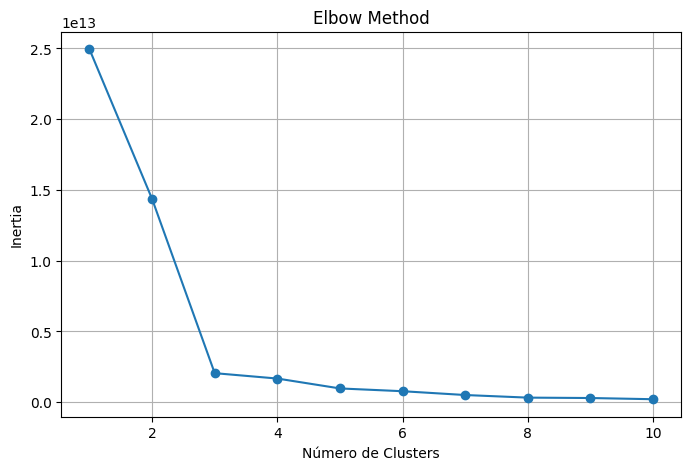

In [27]:
# Lista para armazenar os valores de inertia
inertia = []

# Testar diferentes números de clusters
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_tratado[colunas_numericas])
    inertia.append(kmeans.inertia_)

# Plotar o gráfico do Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Número de Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

### 2.4 Tratamento de Outliers usando 
O algoritmo agrupa os dados em clusters (grupos) com base na semelhança entre os pontos.

Após a clusterização, os pontos que estão distantes do centro (centróide) de seus grupos podem ser considerados outliers, pois não se ajustam bem ao padrão do cluster.

Detecta outliers multivariados (em várias variáveis ao mesmo tempo), o que métodos univariados como IQR ou Z-Score não conseguem.

É útil quando os dados apresentam padrões complexos que não seguem uma distribuição normal.

In [28]:
# Aplicar clustering (exemplo com K-Means)
kmeans = KMeans(n_clusters=3, random_state=42)
df_tratado['cluster'] = kmeans.fit_predict(df_tratado[colunas_numericas])

# Tratar outliers dentro de cada cluster usando IQR
for cluster in df_tratado['cluster'].unique():
    cluster_data = df_tratado[df_tratado['cluster'] == cluster]
    
    for col in colunas_numericas:
        Q1 = cluster_data[col].quantile(0.25)
        Q3 = cluster_data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Substituir outliers pela mediana do cluster
        median_value = cluster_data[col].median()
        df_tratado.loc[
            (df_tratado['cluster'] == cluster) & 
            ((df_tratado[col] < lower_bound) | (df_tratado[col] > upper_bound)), 
            col
        ] = median_value

# Exibir DataFrame tratado
display(df_tratado)

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,...,aeronave_voo_destino,aeronave_tipo_operacao,ocorrencia_ano,idade,outlier_ocorrencia_latitude,outlier_ocorrencia_longitude,outlier_aeronave_pmd,outlier_aeronave_assentos,outlier_aeronave_ano_fabricacao,cluster
0,86954,ACIDENTE,-29.085556,-29.085556,TUPANCIRETÃ,RS,BRASIL,SIPJ,04/04/2025,17:20:00,...,SANTA MARIA,PRIVADA,2,-1988.0,normal,normal,normal,normal,normal,0
1,86953,ACIDENTE,-9.596944,-9.596944,PILAR,AL,BRASIL,FAER,04/04/2025,09:05:00,...,FORA DE AERODROMO,AGRÃCOLA,2,-2008.0,normal,normal,normal,normal,normal,0
2,86952,INCIDENTE,-2.586944,-2.586944,SÃO LUÃS,MA,BRASIL,SBSL,03/04/2025,20:45:00,...,MARECHAL CUNHA MACHADO,EXPERIMENTAL,2,-2012.0,normal,normal,normal,normal,normal,0
3,86951,INCIDENTE GRAVE,-27.133889,-27.133889,CHAPECÃ,SC,BRASIL,SBCH,31/03/2025,22:30:00,...,SERAFIN ENOSS BERTASO,REGULAR,2,-2009.0,normal,normal,normal,normal,normal,1
4,86950,INCIDENTE,-23.435556,-23.435556,GUARULHOS,SP,BRASIL,SBGR,05/04/2025,11:00:00,...,GOVERNADOR ANDRÃ FRANCO MONTORO,REGULAR,2,-2019.0,normal,normal,normal,normal,normal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13146,28377,ACIDENTE,-5.460139,-5.460139,IMPERATRIZ,MA,BRASIL,FAER,27/01/2007,11:18:00,...,COMANDANTE CARLOS INÃCIO AGNES,PRIVADA,2,-1968.0,normal,normal,normal,normal,normal,0
13147,28375,ACIDENTE,-23.612222,-23.612222,APUCARANA,PR,BRASIL,FAER,26/01/2007,18:15:00,...,CONGONHAS,TÃXI AÃREO,2,-2004.0,normal,normal,normal,normal,normal,0
13148,28355,ACIDENTE,-17.254167,-17.254167,BOCAIÃVA,MG,BRASIL,FAER,18/01/2007,09:10:00,...,MÃRIO RIBEIRO,TÃXI AÃREO,2,-1964.0,normal,normal,normal,normal,normal,0
13149,28335,ACIDENTE,-23.344444,-23.344444,LONDRINA,PR,BRASIL,FAER,19/01/2007,12:30:00,...,GOVERNADOR JOSÃ RICHA,PRIVADA,2,-1984.0,normal,normal,normal,normal,normal,0
